In [3]:
# Importing Libraries and Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
data = pd.read_csv('LoanApprovalPrediction.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Data Preprocessing and Visualization

In [7]:
obj = (data.dtypes == 'object')
print("Categorical Variables:", len(list(obj[obj].index)))

Categorical Variables: 7


In [8]:
obj.head(13)

Loan_ID               True
Gender                True
Married               True
Dependents           False
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [9]:
# Dropping Loan_ID column
data.drop(['Loan_ID'], axis=1, inplace=True)

In [10]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


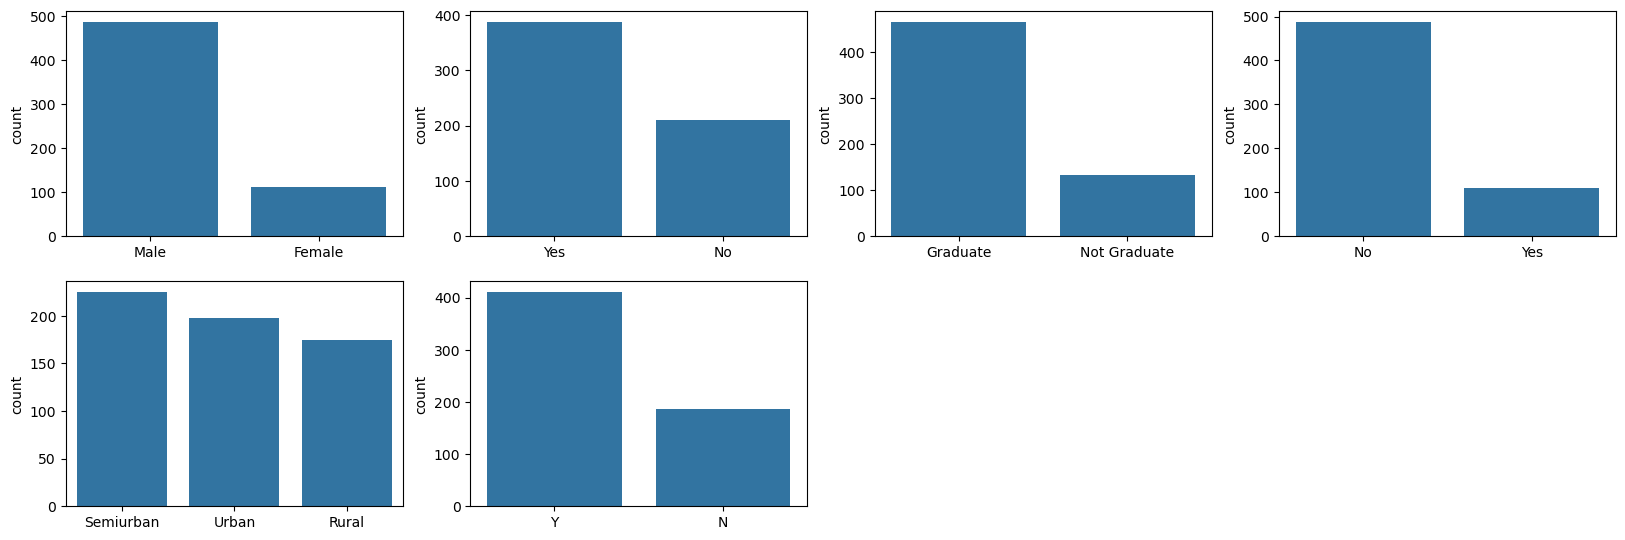

In [11]:
# Visualize all the unique values in columns using barplot

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(20,38))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=0)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [12]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels
obj = (data.dtypes == 'object')

for col in list(obj[obj].index):
    label_encoder = preprocessing.LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

In [13]:
data.head(100)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0.0,0,0,2484,2302.0,137.0,360.0,1.0,1,1
96,1,1,0.0,0,0,1977,997.0,50.0,360.0,1.0,1,1
97,1,1,0.0,1,0,4188,0.0,115.0,180.0,1.0,1,1
98,1,1,0.0,0,0,1759,3541.0,131.0,360.0,1.0,1,1


In [14]:
# To find the number of columns with 
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


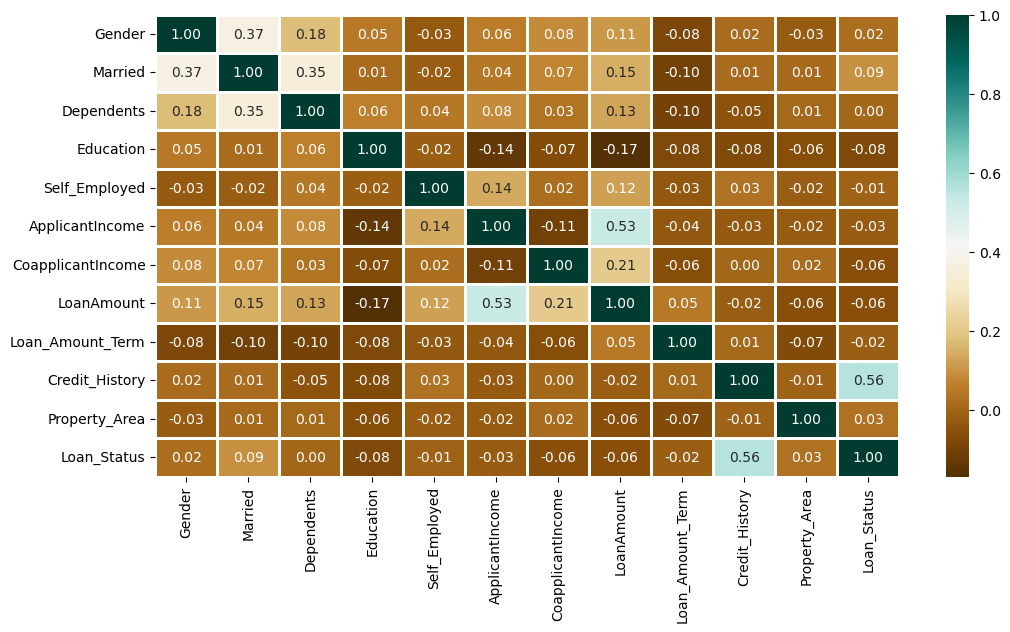

In [15]:
# Heatmap using seaborn
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)
plt.show()

In [16]:
# Insights : The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

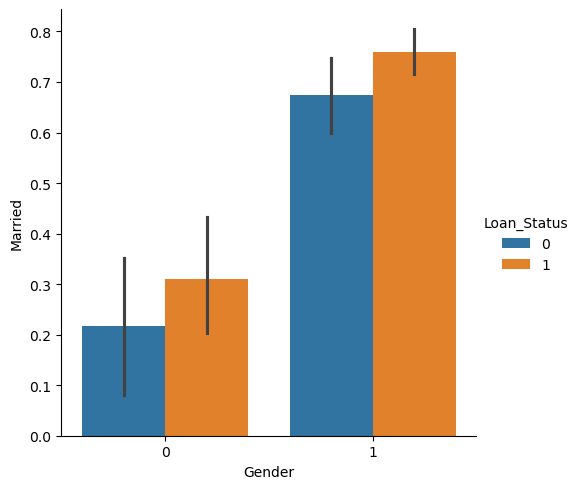

In [17]:
# Catplot to visualize the plot for the Gender, and Marital Status of the applicant.
sns.catplot(x="Gender", y="Married",hue="Loan_Status",kind="bar",data=data)
plt.show()

In [18]:
# Now we will find out if there is any missing values in the dataset using below code.


for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
# Splitting Dataset

from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
y = data['Loan_Status']
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [20]:
# Model Training and Evaluation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy',random_state=7)
svc = SVC()
lc = LogisticRegression()

# Making predictions on the training set
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print("Accuracy score of", clf.__class__.__name__, "=", 100*metrics.accuracy_score(y_train,y_pred))


Accuracy score of RandomForestClassifier = 98.04469273743017
Accuracy score of KNeighborsClassifier = 78.49162011173185
Accuracy score of SVC = 68.71508379888269
Accuracy score of LogisticRegression = 80.16759776536313


c:\Users\Kirti Shendge\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Prediction on the test set

for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test,
                                     y_pred))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.83333333333333


c:\Users\Kirti Shendge\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
import pickle
models = {
    "knn": KNeighborsClassifier(n_neighbors=3),
    "random_forest": RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7),
    "svc": SVC(probability=True),
    "logistic": LogisticRegression()
}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    with open(f"{name}_model.pkl", "wb") as f:
        pickle.dump(clf, f)


c:\Users\Kirti Shendge\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
